<a href="https://colab.research.google.com/github/madenni/NN-DIP/blob/main/NS7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №7. Использование автоэнкодера для решения задач семантической сегментации. Часть 2

[**Ссылка на код с пары**](https://colab.research.google.com/drive/1kcXnm6ZNrjkjUHlkgAIFBmxDd_6lNIHd?usp=sharing)

## Пример создания модели с Unet-подобной архитектурой

In [ ]:
from tensorflow.keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Conv2DTranspose
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

In [ ]:
def mini_u_net(image_shape, num_of_classes):
  
  input_image = Input(image_shape)

  # Encoder
  
  conv1_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
  conv1_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(conv1_1)
  
  pool_1 = MaxPooling2D(name = 'pool_1')(conv1_2)
  
  conv2_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
  conv2_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(conv2_1)
  
  pool_2 = MaxPooling2D(name = 'pool_2')(conv2_2)
  
  conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
  conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(conv3_1)
  
  pool_3 = MaxPooling2D(name = 'pool_3')(conv3_2)
  
  conv4_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
  conv4_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(conv4_1)
  
  
  
  # Decoder
  
  upconv5_1 = UpSampling2D(name = 'upconv5_1')(conv4_2)
  upconv5_2 = Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv5_2')(upconv5_1)
  concat_5 = concatenate([upconv5_2, conv3_2], axis = 3, name = 'concat_5') # Split Connections
  
  conv5_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(concat_5)
  conv5_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(conv5_1)
  
  
  upconv6_1 = UpSampling2D(name = 'upconv6_1')(conv5_2)
  upconv6_2 = Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv6_2')(upconv6_1)
  concat_6 = concatenate([upconv6_2, conv2_2], axis = 3, name = 'concat_6') # Split Connections
  
  conv6_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_6)
  conv6_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(conv6_1)
  
  upconv7_1 = UpSampling2D(name = 'upconv7_1')(conv6_2)
  upconv7_2 = Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_2')(upconv7_1)
  concat_7 = concatenate([upconv7_2, conv1_2], axis = 3, name = 'concat_7') # Split Connections
  
  conv7_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_7)
  conv7_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(conv7_1)
  
  conv8 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv8')(conv7_2)
  
  model = Model(inputs = input_image, outputs = conv8, name = 'model')
  
  return model

In [ ]:
unet_model = mini_u_net(image_shape = [256, 256, 3], num_of_classes = 6)

### Описание и визуализация архитектуры созданной модели

In [ ]:
unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 256, 256, 32  9248        ['conv1_1[0][0]']                
                                )                                                             

In [ ]:
unet_model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv1_1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'C

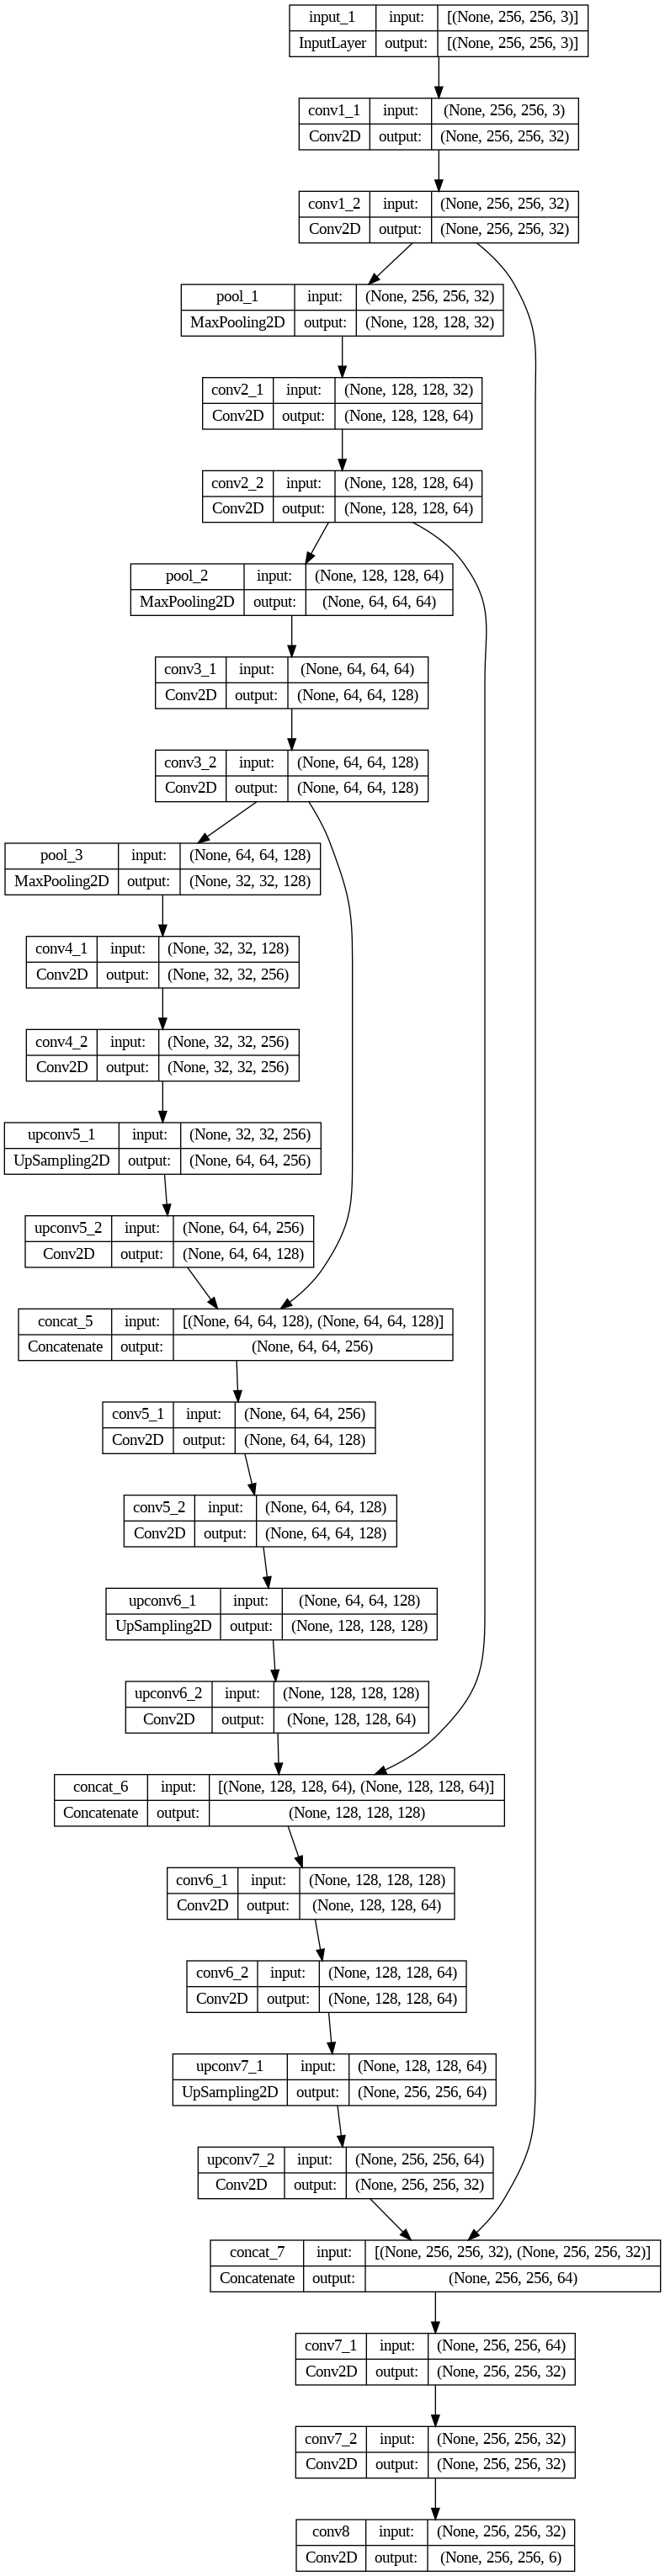

In [ ]:
plot_model(
unet_model, to_file='model.png', show_shapes=True, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

Для визуализации архитектуры модели используется следующий код:

```
plot_model(
unet_model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)
```



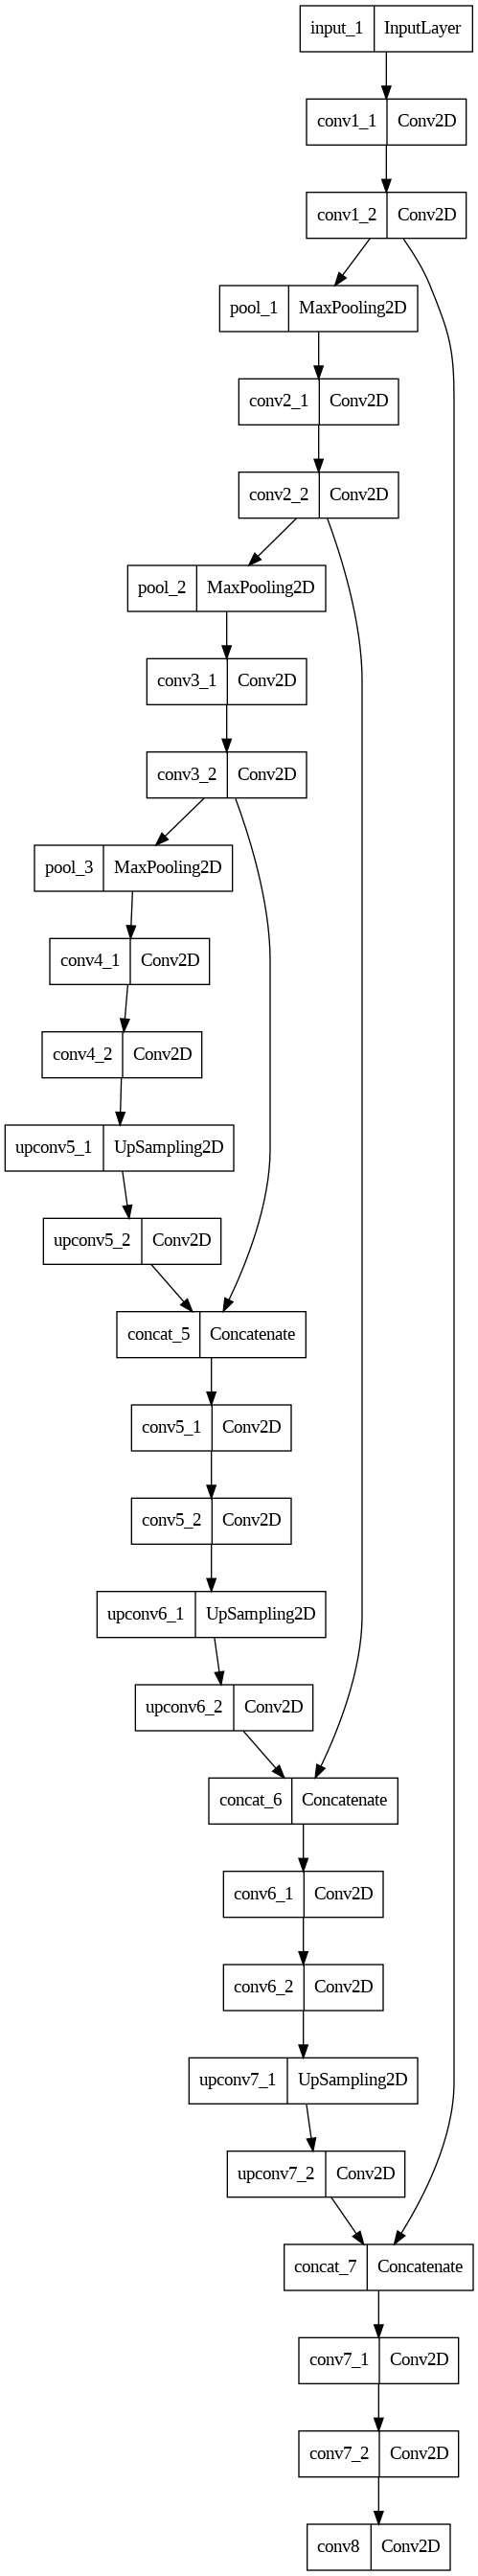

## Задание №1. Создайте модель со следующей архитектурой:

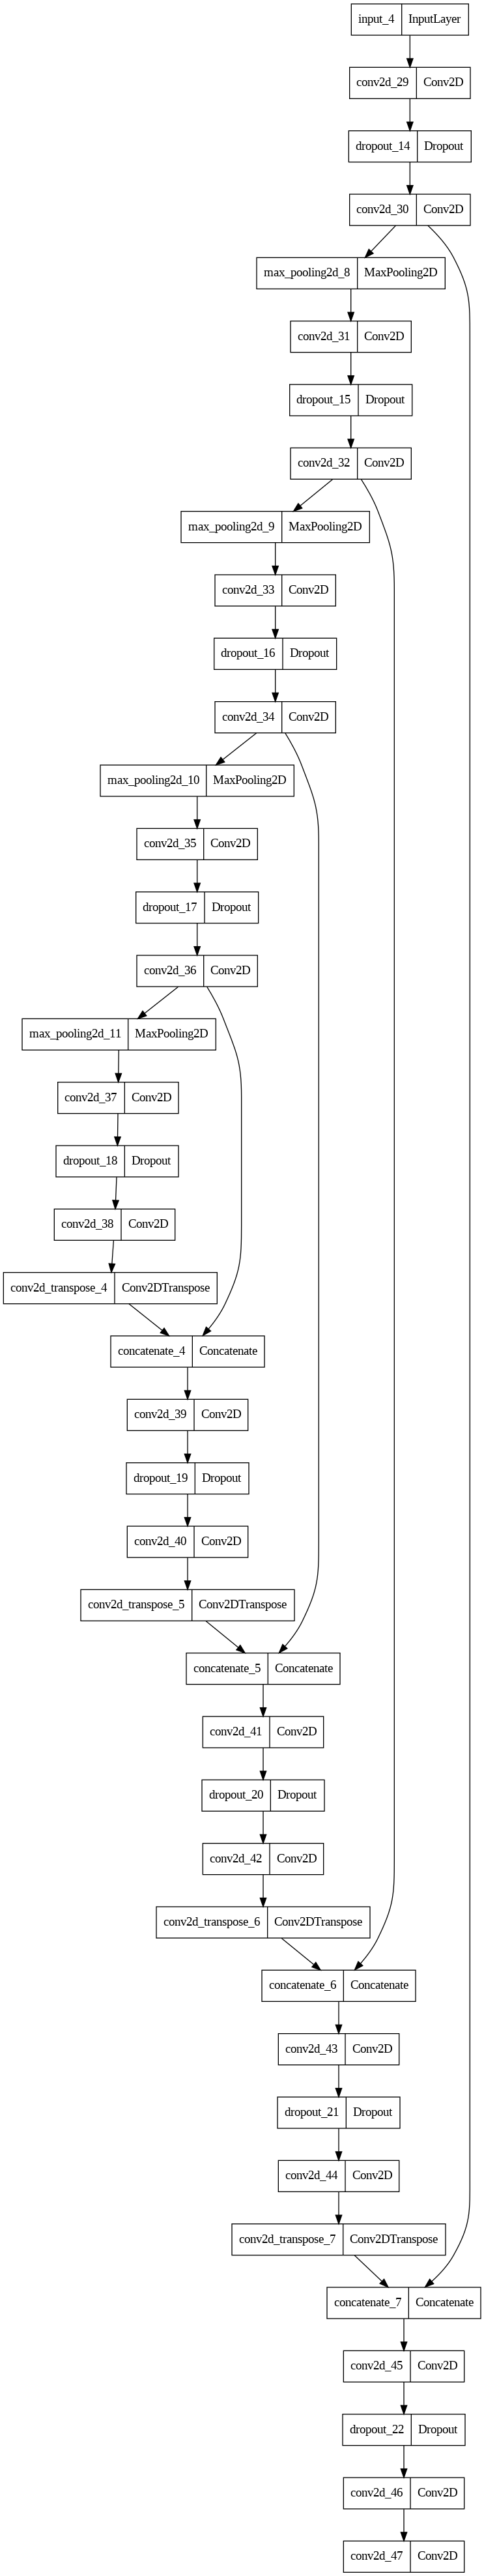

In [ ]:
!pip install patchify
!pip install split-folders
!pip install tensorflow==2.9.0
!pip install -U -q segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 113.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.5 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Conv2DTranspose, BatchNormalization
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

In [ ]:
def my_mini_u_net(image_shape, num_of_classes):
  
  input_4 = Input(image_shape)

  conv2d_29 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_29')(input_4)
  dropout_14 = Dropout(0.5, name = 'dropout_14')(conv2d_29)
  conv2d_30 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_30')(dropout_14)
  
  max_pooling2d_8 = MaxPooling2D(name = 'max_pooling2d_8')(conv2d_30)
  
  conv2d_31 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_31')(max_pooling2d_8)
  dropout_15 = Dropout(0.5, name = 'dropout_15')(conv2d_31)
  conv2d_32 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_32')(dropout_15)
  
  max_pooling2d_9 = MaxPooling2D(name = 'max_pooling2d_9')(conv2d_32)
  
  conv2d_33 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_33')(max_pooling2d_9)
  dropout_16 = Dropout(0.5, name = 'dropout_16')(conv2d_33)
  conv2d_34 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_34')(dropout_16)
  
  max_pooling2d_10 = MaxPooling2D(name = 'max_pooling2d_10')(conv2d_34)
  conv2d_35 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_35')(max_pooling2d_10)
  dropout_17 = Dropout(0.5, name = 'dropout_17')(conv2d_35)
  conv2d_36 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_36')(dropout_17)

  max_pooling2d_11 = MaxPooling2D(name = 'max_pooling2d_11')(conv2d_36)
  conv2d_37 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_37')(max_pooling2d_11)
  dropout_18 = Dropout(0.5, name = 'dropout_18')(conv2d_37)
  conv2d_38 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_38')(dropout_18)

  conv2d_transponse_4 = Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same", name = 'conv2d_transponse_4')(conv2d_38)
  
  
  
  concatenate_4 = concatenate([conv2d_transponse_4, conv2d_36], axis = 3, name = 'concatenate_4') # Split Connections
  
  conv2d_39 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_39')(concatenate_4)
  dropout_19 = Dropout(0.5, name = 'dropout_19')(conv2d_39)
  conv2d_40 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_40')(dropout_19)
  conv2d_transponse_5 = Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same", name = 'conv2d_transponse_5')(conv2d_40)

  concatenate_5 = concatenate([conv2d_transponse_5, conv2d_34], axis = 3, name = 'concatenate_5') # Split Connections
  
  conv2d_41 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_41')(concatenate_5)
  dropout_20 = Dropout(0.5, name = 'dropout_20')(conv2d_41)
  
  conv2d_42 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_42')(dropout_20)
  conv2d_transponse_6 = Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same", name = 'conv2d_transponse_6')(conv2d_42)
  
  concatenate_6 = concatenate([conv2d_transponse_6, conv2d_32], axis = 3, name = 'concatenate_6') # Split Connections
  
  conv2d_43 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_43')(concatenate_6)
  dropout_21 = Dropout(0.5, name = 'dropout_21')(conv2d_43)
  conv2d_44 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_44')(dropout_21)
  conv2d_transponse_7 = Conv2DTranspose(16, (3, 3), strides=2, activation="relu", padding="same", name = 'conv2d_transponse_7')(conv2d_44)

  concatenate_7 = concatenate([conv2d_transponse_7, conv2d_30], axis = 3, name = 'concatenate_7') # Split Connections
  
  conv2d_45 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_45')(concatenate_7)
  dropout_22 = Dropout(0.5, name = 'dropout_22')(conv2d_45)
  conv2d_46 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_46')(dropout_22)
  
  conv2d_47 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv2d_47')(conv2d_46)

  model = Model(inputs = input_4, outputs = conv2d_47, name = 'model')
  
  
  return model

In [ ]:
model_2 = my_mini_u_net(image_shape = [256, 256, 3], num_of_classes = 6)

In [ ]:
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_29 (Conv2D)             (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_14 (Dropout)           (None, 256, 256, 32  0           ['conv2d_29[0][0]']              
                                )                                                             

In [ ]:
model_2.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_29',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d_29',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'con

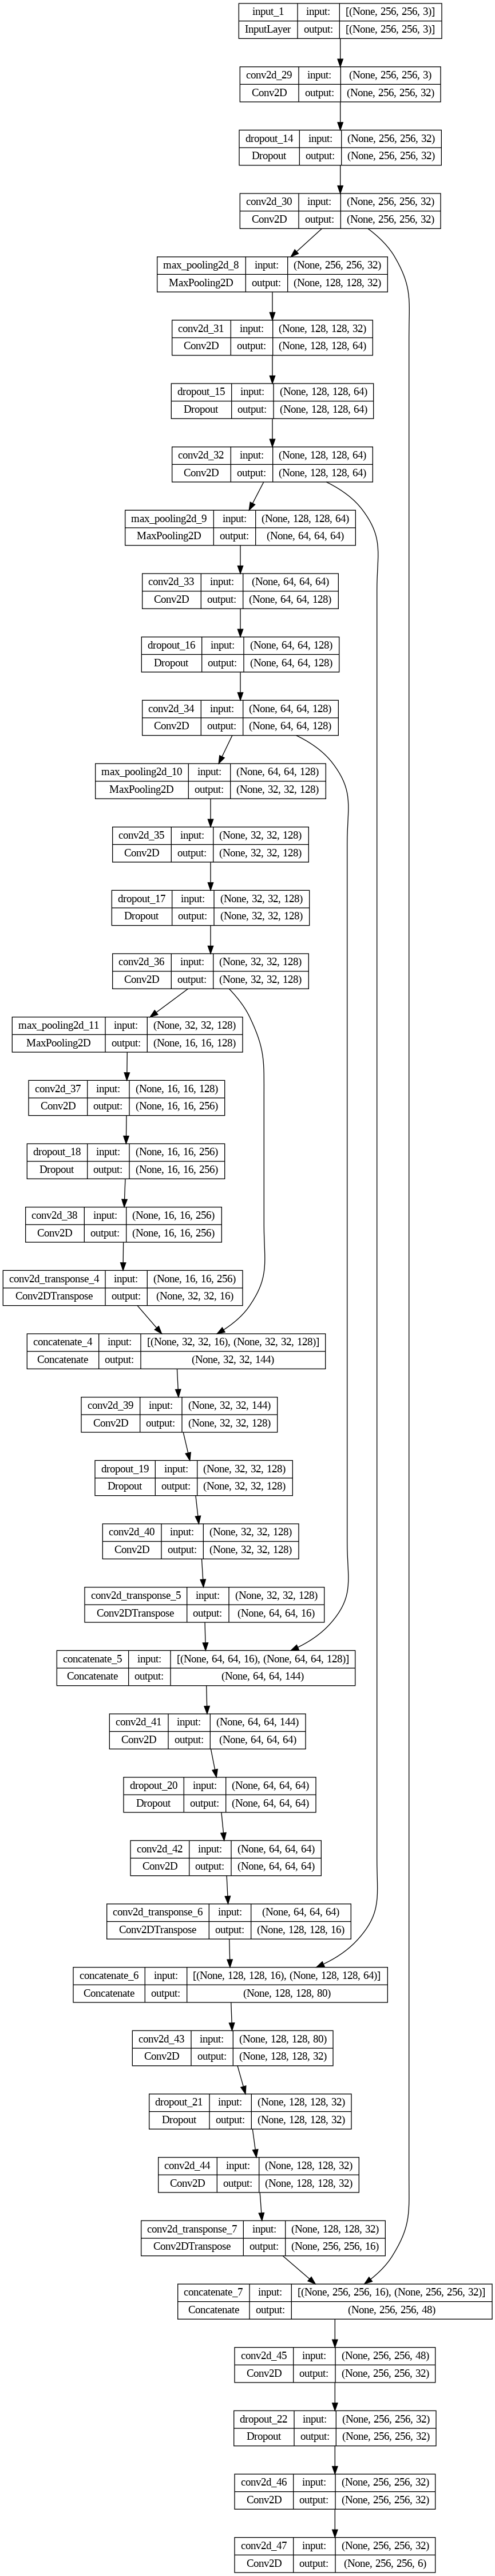

In [ ]:

plot_model(
model_2, to_file='model.png', show_shapes=True, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

## Задание №2. Обучите созданную модель для решения задачи семантической сегментации. В качестве функции потерь используйте ту, которая лучше всего показала себя в первой части работы

### 2.1. Загрузите три снимка, а также маски, соответствующие этим снимкам, из папки Tiles 8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

img0 = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_004.jpg", 1)
mask0 = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_004.png", 1)
mask0 = cv2.cvtColor(mask0,cv2.COLOR_BGR2RGB)

img1 = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_005.jpg", 1)
mask1 = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_005.png", 1)
mask1 = cv2.cvtColor(mask1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/images/image_part_001.jpg", 1)
mask2 = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks/image_part_001.png", 1)
mask2 = cv2.cvtColor(mask2,cv2.COLOR_BGR2RGB)

### 2.2. Используя обученную модель, обработайте снимки по технологии, рассмотренной на практическом занятии (делим снимок на части, затем каждую часть обрабатываем нейросетью, а после соединяем все части для получения полноразмерной маски исходного снимка)

In [ ]:
import numpy as np 
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

In [ ]:
def rgb_to_2D_label(label):
    """
    Замена значений каждого пикселя маски в формате RGB на целое число 
    
    """

    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5

    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import segmentation_models as sm

scaler = MinMaxScaler()
from keras.utils import to_categorical

#Use this to preprocess input for transfer learning
BACKBONE = 'resnet50'
preprocess_input = sm.get_preprocessing(BACKBONE)

def preprocess_data(img, mask, num_class):
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img) 
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

Segmentation Models: using `keras` framework.


In [ ]:
seed=24
batch_size= 16
n_classes=6

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [ ]:
train_img_path = '/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_image'
train_mask_path = '/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_mask'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=6)

val_img_path = '/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_image'
val_mask_path = '/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_mask'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)

Found 411 images belonging to 1 classes.
Found 411 images belonging to 1 classes.


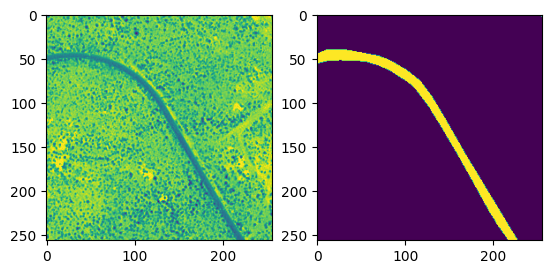

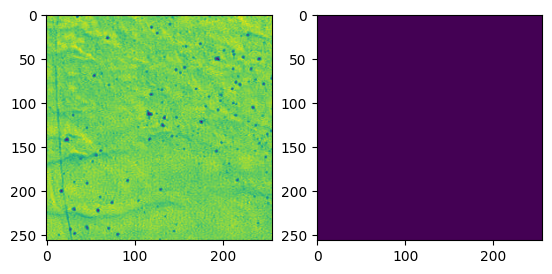

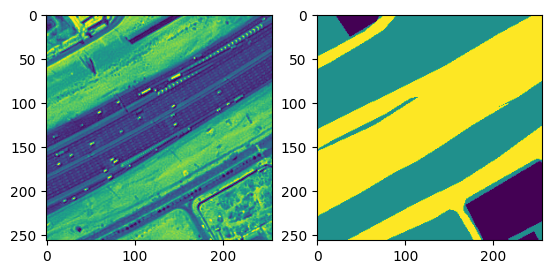

Found 138 images belonging to 1 classes.
Found 138 images belonging to 1 classes.


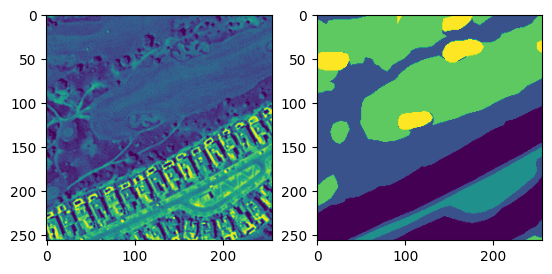

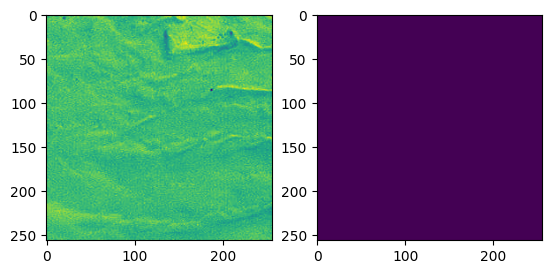

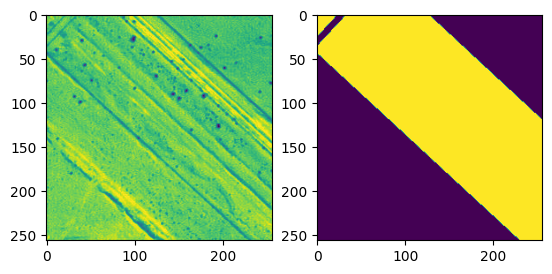

Unique labels in label dataset are:  [1 2]


In [ ]:
from matplotlib import pyplot as plt
x, y = train_img_gen.__next__()

for i in range(0,3):
    image = x[i][:,:,0]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.show()

x_val, y_val = val_img_gen.__next__()

for i in range(0,3):
    image = x_val[i][:,:,0]
    mask = np.argmax(y_val[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.show()

labels, count = np.unique(mask, return_counts=True) #Check for each channel. All chanels are identical

print("Unique labels in label dataset are: ", np.unique(labels))

In [ ]:
import os
num_train_imgs = len(os.listdir(r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/train_image/train/'))
num_val_images = len(os.listdir(r'/content/drive/MyDrive/Semantic segmentation dataset/NewData/val_mask/mask/'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]

n_classes=6

print(num_train_imgs, steps_per_epoch, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
print(num_train_imgs, num_val_images, steps_per_epoch, val_steps_per_epoch, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

411 25 256 256 3
411 138 25 8 256 256 3


In [ ]:
from keras import backend as K
def jacard_coef(y_true, y_pred): 
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [ ]:
import segmentation_models as sm
from tensorflow.keras.optimizers import Adam
metrics = ['accuracy', sm.metrics.iou_score]
dice_loss = sm.losses.DiceLoss()
loss=dice_loss
n_classes = 6
opt = Adam(lr=0.00001)

model_2.compile(optimizer=opt, loss=loss, metrics=metrics)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_model_2=model_2.fit(
          train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_gen,
          validation_steps=val_steps_per_epoch)

Epoch 1/100
25/25 [==============================] - 393s 16s/step - loss: 0.8826 - accuracy: 0.1372 - iou_score: 0.0645 - val_loss: 0.8718 - val_accuracy: 0.0779 - val_iou_score: 0.0702
Epoch 2/100
25/25 [==============================] - 19s 790ms/step - loss: 0.8815 - accuracy: 0.1853 - iou_score: 0.0653 - val_loss: 0.8702 - val_accuracy: 0.0843 - val_iou_score: 0.0717
Epoch 3/100
25/25 [==============================] - 17s 708ms/step - loss: 0.8808 - accuracy: 0.2593 - iou_score: 0.0660 - val_loss: 0.8704 - val_accuracy: 0.2046 - val_iou_score: 0.0710
Epoch 4/100
25/25 [==============================] - 17s 701ms/step - loss: 0.8757 - accuracy: 0.3487 - iou_score: 0.0691 - val_loss: 0.8681 - val_accuracy: 0.5255 - val_iou_score: 0.0733
Epoch 5/100
25/25 [==============================] - 17s 698ms/step - loss: 0.8726 - accuracy: 0.4816 - iou_score: 0.0715 - val_loss: 0.8665 - val_accuracy: 0.5574 - val_iou_score: 0.0735
Epoch 6/100
25/25 [==============================] - 17s 695m

In [ ]:
model_2.save('/content/drive/MyDrive/Model_2.h5')

In [ ]:
from keras.models import load_model
model_2 = load_model('/content/drive/MyDrive/Model_2.h5', compile=False)

In [ ]:
from patchify import patchify, unpatchify
from PIL import Image
patch_size = 256

n_classes = 6

In [ ]:
import numpy as np
SIZE_X = (img0.shape[1]//patch_size)*patch_size
SIZE_Y = (img0.shape[0]//patch_size)*patch_size
large_img = Image.fromarray(img0)
large_img = large_img.crop((0 ,0, SIZE_X, SIZE_Y))
large_img = np.array(large_img)     


patches_img = patchify(large_img, (patch_size, patch_size, 3), step=patch_size)
patches_img = patches_img[:,:,0,:,:,:]

1/1 [==============================] - 0s 30ms/step


(-0.5, 2047.5, 1279.5, -0.5)

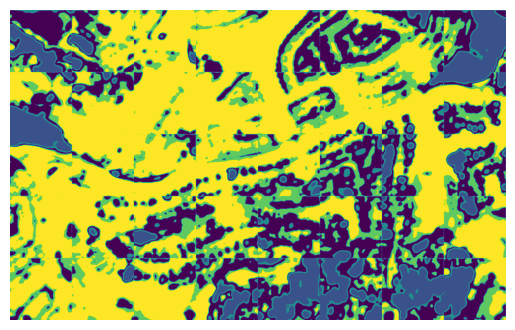

In [ ]:
patched_prediction = []
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        
        single_patch_img = patches_img[i,j,:,:,:]
        
        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
        single_patch_img = np.expand_dims(single_patch_img, axis=0)
        pred = model_2.predict(single_patch_img)
        pred = np.argmax(pred, axis=3)
        pred = pred[0, :,:]
                                 
        patched_prediction.append(pred)

patched_prediction = np.array(patched_prediction)
patched_prediction = np.reshape(patched_prediction, [patches_img.shape[0], patches_img.shape[1], 
                                            patches_img.shape[2], patches_img.shape[3]])

unpatched_prediction = unpatchify(patched_prediction, (large_img.shape[0], large_img.shape[1]))

plt.imshow(unpatched_prediction)
plt.axis('off')

In [ ]:
"""

Original code is from the following source. It comes with MIT License so please mention
the original reference when sharing.

The original code has been modified to fix a couple of bugs and chunks of code
unnecessary for smooth tiling are removed. 

# MIT License
# Copyright (c) 2017 Vooban Inc.
# Coded by: Guillaume Chevalier
# Source to original code and license:
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches/blob/master/LICENSE

"""
"""Perform smooth predictions on an image from tiled prediction patches."""


import numpy as np
import scipy.signal
from tqdm import tqdm

import gc


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    PLOT_PROGRESS = False
    # See end of file for the rest of the __main__.
else:
    PLOT_PROGRESS = False


def _spline_window(window_size, power=2):
    """
    Squared spline (power=2) window function:
    https://www.wolframalpha.com/input/?i=y%3Dx**2,+y%3D-(x-2)**2+%2B2,+y%3D(x-4)**2,+from+y+%3D+0+to+2
    """
    intersection = int(window_size/4)
    wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
    wind_outer[intersection:-intersection] = 0

    wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
    wind_inner[:intersection] = 0
    wind_inner[-intersection:] = 0

    wind = wind_inner + wind_outer
    wind = wind / np.average(wind)
    return wind


cached_2d_windows = dict()
def _window_2D(window_size, power=2):
    """
    Make a 1D window function, then infer and return a 2D window function.
    Done with an augmentation, and self multiplication with its transpose.
    Could be generalized to more dimensions.
    """
    # Memoization
    global cached_2d_windows
    key = "{}_{}".format(window_size, power)
    if key in cached_2d_windows:
        wind = cached_2d_windows[key]
    else:
        wind = _spline_window(window_size, power)
        wind = np.expand_dims(np.expand_dims(wind, 1), 1)      #SREENI: Changed from 3, 3, to 1, 1 
        wind = wind * wind.transpose(1, 0, 2)
        if PLOT_PROGRESS:
            # For demo purpose, let's look once at the window:
            plt.imshow(wind[:, :, 0], cmap="viridis")
            plt.title("2D Windowing Function for a Smooth Blending of "
                      "Overlapping Patches")
            plt.show()
        cached_2d_windows[key] = wind
    return wind


def _pad_img(img, window_size, subdivisions):
    """
    Add borders to img for a "valid" border pattern according to "window_size" and
    "subdivisions".
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    more_borders = ((aug, aug), (aug, aug), (0, 0))
    ret = np.pad(img, pad_width=more_borders, mode='reflect')
    # gc.collect()

    if PLOT_PROGRESS:
        # For demo purpose, let's look once at the window:
        plt.imshow(ret)
        plt.title("Padded Image for Using Tiled Prediction Patches\n"
                  "(notice the reflection effect on the padded borders)")
        plt.show()
    return ret


def _unpad_img(padded_img, window_size, subdivisions):
    """
    Undo what's done in the `_pad_img` function.
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    ret = padded_img[
        aug:-aug,
        aug:-aug,
        :
    ]
    # gc.collect()
    return ret


def _rotate_mirror_do(im):
    """
    Duplicate an np array (image) of shape (x, y, nb_channels) 8 times, in order
    to have all the possible rotations and mirrors of that image that fits the
    possible 90 degrees rotations.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    mirrs = []
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    im = np.array(im)[:, ::-1]
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    return mirrs


def _rotate_mirror_undo(im_mirrs):
    """
    merges a list of 8 np arrays (images) of shape (x, y, nb_channels) generated
    from the `_rotate_mirror_do` function. Each images might have changed and
    merging them implies to rotated them back in order and average things out.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    origs = []
    origs.append(np.array(im_mirrs[0]))
    origs.append(np.rot90(np.array(im_mirrs[1]), axes=(0, 1), k=3))
    origs.append(np.rot90(np.array(im_mirrs[2]), axes=(0, 1), k=2))
    origs.append(np.rot90(np.array(im_mirrs[3]), axes=(0, 1), k=1))
    origs.append(np.array(im_mirrs[4])[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[5]), axes=(0, 1), k=3)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[6]), axes=(0, 1), k=2)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[7]), axes=(0, 1), k=1)[:, ::-1])
    return np.mean(origs, axis=0)


def _windowed_subdivs(padded_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Create tiled overlapping patches.
    Returns:
        5D numpy array of shape = (
            nb_patches_along_X,
            nb_patches_along_Y,
            patches_resolution_along_X,
            patches_resolution_along_Y,
            nb_output_channels
        )
    Note:
        patches_resolution_along_X == patches_resolution_along_Y == window_size
    """
    WINDOW_SPLINE_2D = _window_2D(window_size=window_size, power=2)

    step = int(window_size/subdivisions)
    padx_len = padded_img.shape[0]
    pady_len = padded_img.shape[1]
    subdivs = []

    for i in range(0, padx_len-window_size+1, step):
        subdivs.append([])
        for j in range(0, pady_len-window_size+1, step):            #SREENI: Changed padx to pady (Bug in original code)
            patch = padded_img[i:i+window_size, j:j+window_size, :]
            subdivs[-1].append(patch)

    # Here, `gc.collect()` clears RAM between operations.
    # It should run faster if they are removed, if enough memory is available.
    gc.collect()
    subdivs = np.array(subdivs)
    gc.collect()
    a, b, c, d, e = subdivs.shape
    subdivs = subdivs.reshape(a * b, c, d, e)
    gc.collect()

    subdivs = pred_func(subdivs)
    gc.collect()
    subdivs = np.array([patch * WINDOW_SPLINE_2D for patch in subdivs])
    gc.collect()

    # Such 5D array:
    subdivs = subdivs.reshape(a, b, c, d, nb_classes)
    gc.collect()

    return subdivs


def _recreate_from_subdivs(subdivs, window_size, subdivisions, padded_out_shape):
    """
    Merge tiled overlapping patches smoothly.
    """
    step = int(window_size/subdivisions)
    padx_len = padded_out_shape[0]
    pady_len = padded_out_shape[1]

    y = np.zeros(padded_out_shape)

    a = 0
    for i in range(0, padx_len-window_size+1, step):
        b = 0
        for j in range(0, pady_len-window_size+1, step):                #SREENI: Changed padx to pady (Bug in original code)
            windowed_patch = subdivs[a, b]
            y[i:i+window_size, j:j+window_size] = y[i:i+window_size, j:j+window_size] + windowed_patch
            b += 1
        a += 1
    return y / (subdivisions ** 2)


def predict_img_with_smooth_windowing(input_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Apply the `pred_func` function to square patches of the image, and overlap
    the predictions to merge them smoothly.
    See 6th, 7th and 8th idea here:
    http://blog.kaggle.com/2017/05/09/dstl-satellite-imagery-competition-3rd-place-winners-interview-vladimir-sergey/
    """
    pad = _pad_img(input_img, window_size, subdivisions)
    pads = _rotate_mirror_do(pad)

    # Note that the implementation could be more memory-efficient by merging
    # the behavior of `_windowed_subdivs` and `_recreate_from_subdivs` into
    # one loop doing in-place assignments to the new image matrix, rather than
    # using a temporary 5D array.

    # It would also be possible to allow different (and impure) window functions
    # that might not tile well. Adding their weighting to another matrix could
    # be done to later normalize the predictions correctly by dividing the whole
    # reconstructed thing by this matrix of weightings - to normalize things
    # back from an impure windowing function that would have badly weighted
    # windows.

    # For example, since the U-net of Kaggle's DSTL satellite imagery feature
    # prediction challenge's 3rd place winners use a different window size for
    # the input and output of the neural net's patches predictions, it would be
    # possible to fake a full-size window which would in fact just have a narrow
    # non-zero dommain. This may require to augment the `subdivisions` argument
    # to 4 rather than 2.

    res = []
    for pad in tqdm(pads):
        # For every rotation:
        sd = _windowed_subdivs(pad, window_size, subdivisions, nb_classes, pred_func)
        one_padded_result = _recreate_from_subdivs(
            sd, window_size, subdivisions,
            padded_out_shape=list(pad.shape[:-1])+[nb_classes])

        res.append(one_padded_result)

    # Merge after rotations:
    padded_results = _rotate_mirror_undo(res)

    prd = _unpad_img(padded_results, window_size, subdivisions)

    prd = prd[:input_img.shape[0], :input_img.shape[1], :]

    if PLOT_PROGRESS:
        plt.imshow(prd)
        plt.title("Smoothly Merged Patches that were Tiled Tighter")
        plt.show()
    return prd




In [ ]:
patch_size = 256

input_img = scaler.fit_transform(img0.reshape(-1, img0.shape[-1])).reshape(img0.shape)
# При использовании алгоритма Вы передаёте Вашу `pred_func` (model.predict(...)), которая будет обрабатывать все изображения 8 раз, накладывая небольшие участки с перекрытием, 
# Обратите внимание, что model.predict(...) принимает 4D тензор формы (batch, x, y, nb_channels).
predictions_smooth0 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model_2.predict((img_batch_subdiv))
    )
)

final_prediction0 = np.argmax(predictions_smooth0, axis=2)

  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 5s 344ms/step


 12%|█▎        | 1/8 [00:13<01:36, 13.83s/it]

7/7 [==============================] - 1s 138ms/step


 25%|██▌       | 2/8 [00:24<01:10, 11.73s/it]

7/7 [==============================] - 1s 138ms/step


 38%|███▊      | 3/8 [00:30<00:45,  9.09s/it]

7/7 [==============================] - 1s 139ms/step


 50%|█████     | 4/8 [00:35<00:29,  7.48s/it]

7/7 [==============================] - 1s 137ms/step


 62%|██████▎   | 5/8 [00:39<00:19,  6.53s/it]

7/7 [==============================] - 1s 137ms/step


 75%|███████▌  | 6/8 [00:47<00:13,  6.73s/it]

7/7 [==============================] - 1s 143ms/step


 88%|████████▊ | 7/8 [00:53<00:06,  6.61s/it]

7/7 [==============================] - 1s 142ms/step


100%|██████████| 8/8 [00:59<00:00,  7.46s/it]


In [ ]:
def label_to_rgb(predicted_image):
    
    Building = '#3C1098'.lstrip('#')
    Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152
    
    Land = '#8429F6'.lstrip('#')
    Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246
    
    Road = '#6EC1E4'.lstrip('#') 
    Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228
    
    Vegetation =  'FEDD3A'.lstrip('#') 
    Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58
    
    Water = 'E2A929'.lstrip('#') 
    Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41
    
    Unlabeled = '#9B9B9B'.lstrip('#') 
    Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155
    
    
    
    segmented_img = np.empty((predicted_image.shape[0], predicted_image.shape[1], 3))
    
    segmented_img[(predicted_image == 0)] = Building
    segmented_img[(predicted_image == 1)] = Land
    segmented_img[(predicted_image == 2)] = Road
    segmented_img[(predicted_image == 3)] = Vegetation
    segmented_img[(predicted_image == 4)] = Water
    segmented_img[(predicted_image == 5)] = Unlabeled
    
    segmented_img = segmented_img.astype(np.uint8)
    return(segmented_img)

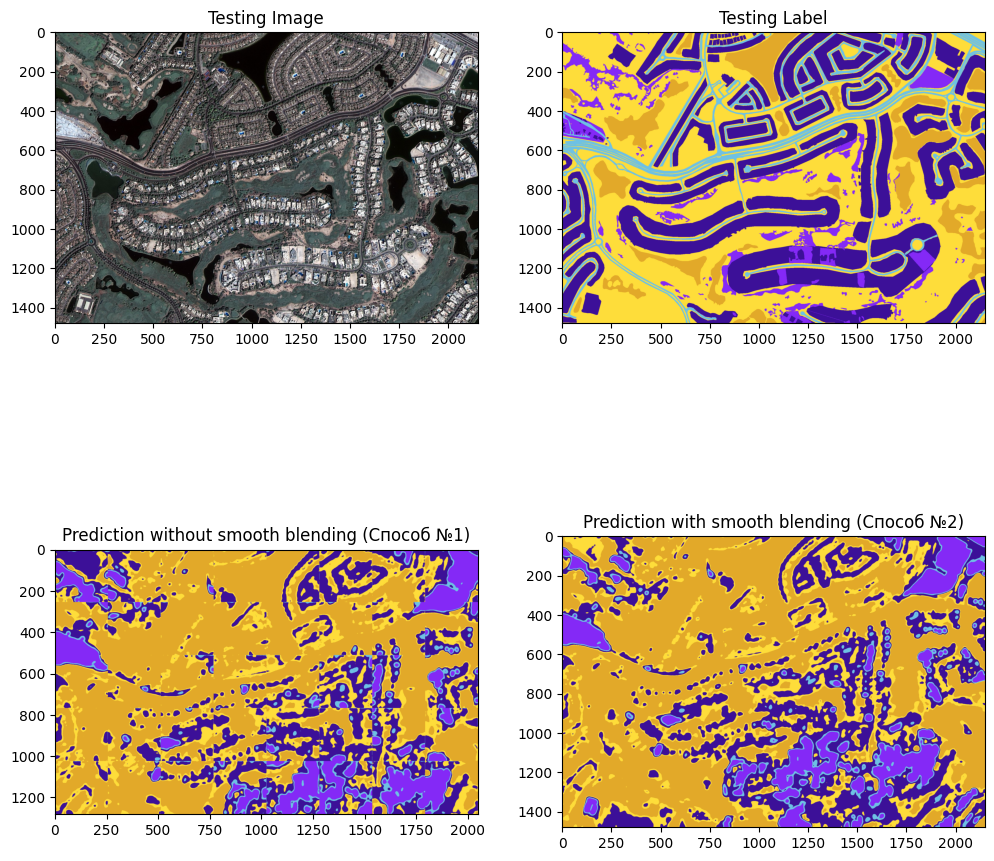

In [ ]:
prediction_with_smooth_blending=label_to_rgb(final_prediction0)
prediction_without_smooth_blending=label_to_rgb(unpatched_prediction)


plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(img0)
plt.subplot(222)
plt.title('Testing Label')
plt.imshow(mask0)
plt.subplot(223)
plt.title('Prediction without smooth blending (Способ №1)')
plt.imshow(prediction_without_smooth_blending)
plt.subplot(224)
plt.title('Prediction with smooth blending (Способ №2)')
plt.imshow(prediction_with_smooth_blending)
plt.show()

In [ ]:
SIZE_X = (img1.shape[1]//patch_size)*patch_size
SIZE_Y = (img1.shape[0]//patch_size)*patch_size
large_img = Image.fromarray(img1)
large_img = large_img.crop((0 ,0, SIZE_X, SIZE_Y))
large_img = np.array(large_img)     


patches_img = patchify(large_img, (patch_size, patch_size, 3), step=patch_size)
patches_img = patches_img[:,:,0,:,:,:]

1/1 [==============================] - 0s 42ms/step


(-0.5, 2047.5, 1279.5, -0.5)

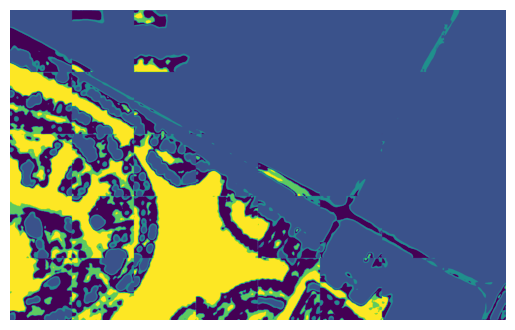

In [ ]:
patched_prediction = []
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        
        single_patch_img = patches_img[i,j,:,:,:]
        
        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
        single_patch_img = np.expand_dims(single_patch_img, axis=0)
        pred = model_2.predict(single_patch_img)
        pred = np.argmax(pred, axis=3)
        pred = pred[0, :,:]
                                 
        patched_prediction.append(pred)

patched_prediction = np.array(patched_prediction)
patched_prediction = np.reshape(patched_prediction, [patches_img.shape[0], patches_img.shape[1], 
                                            patches_img.shape[2], patches_img.shape[3]])

unpatched_prediction1 = unpatchify(patched_prediction, (large_img.shape[0], large_img.shape[1]))

plt.imshow(unpatched_prediction1)
plt.axis('off')

In [ ]:
patch_size = 256

input_img = scaler.fit_transform(img1.reshape(-1, img1.shape[-1])).reshape(img1.shape)
# При использовании алгоритма Вы передаёте Вашу `pred_func` (model.predict(...)), которая будет обрабатывать все изображения 8 раз, накладывая небольшие участки с перекрытием, 
# Обратите внимание, что model.predict(...) принимает 4D тензор формы (batch, x, y, nb_channels).
predictions_smooth1 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model_2.predict((img_batch_subdiv))
    )
)

final_prediction1 = np.argmax(predictions_smooth1, axis=2)

  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 140ms/step


 12%|█▎        | 1/8 [00:06<00:43,  6.26s/it]

7/7 [==============================] - 1s 138ms/step


 25%|██▌       | 2/8 [00:11<00:33,  5.58s/it]

7/7 [==============================] - 1s 141ms/step


 38%|███▊      | 3/8 [00:15<00:25,  5.06s/it]

7/7 [==============================] - 1s 141ms/step


 50%|█████     | 4/8 [00:21<00:20,  5.20s/it]

7/7 [==============================] - 1s 139ms/step


 62%|██████▎   | 5/8 [00:26<00:15,  5.31s/it]

7/7 [==============================] - 1s 142ms/step


 75%|███████▌  | 6/8 [00:31<00:10,  5.05s/it]

7/7 [==============================] - 1s 139ms/step


 88%|████████▊ | 7/8 [00:35<00:04,  4.85s/it]

7/7 [==============================] - 1s 143ms/step


100%|██████████| 8/8 [00:42<00:00,  5.35s/it]


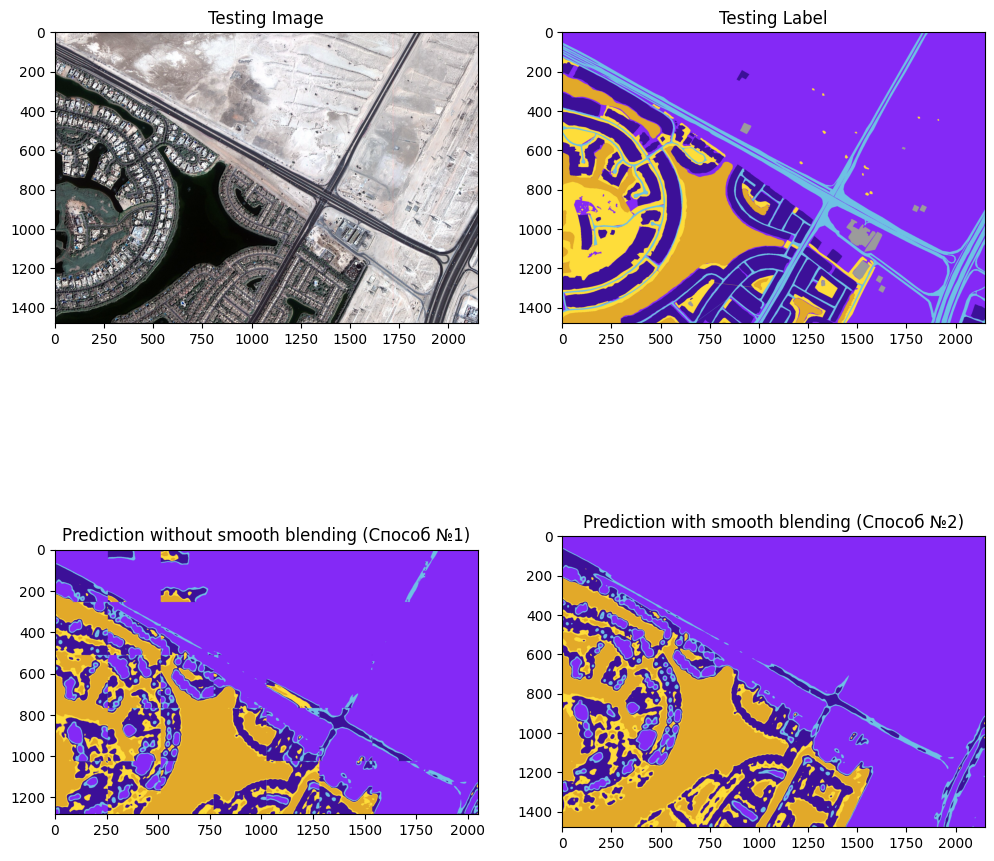

In [ ]:
prediction_with_smooth_blending=label_to_rgb(final_prediction1)
prediction_without_smooth_blending=label_to_rgb(unpatched_prediction1)


plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(img1)
plt.subplot(222)
plt.title('Testing Label')
plt.imshow(mask1)
plt.subplot(223)
plt.title('Prediction without smooth blending (Способ №1)')
plt.imshow(prediction_without_smooth_blending)
plt.subplot(224)
plt.title('Prediction with smooth blending (Способ №2)')
plt.imshow(prediction_with_smooth_blending)
plt.show()

In [ ]:
SIZE_X = (img2.shape[1]//patch_size)*patch_size
SIZE_Y = (img2.shape[0]//patch_size)*patch_size
large_img = Image.fromarray(img2)
large_img = large_img.crop((0 ,0, SIZE_X, SIZE_Y))
large_img = np.array(large_img)     


patches_img = patchify(large_img, (patch_size, patch_size, 3), step=patch_size)
patches_img = patches_img[:,:,0,:,:,:]

1/1 [==============================] - 0s 37ms/step


(-0.5, 2047.5, 1279.5, -0.5)

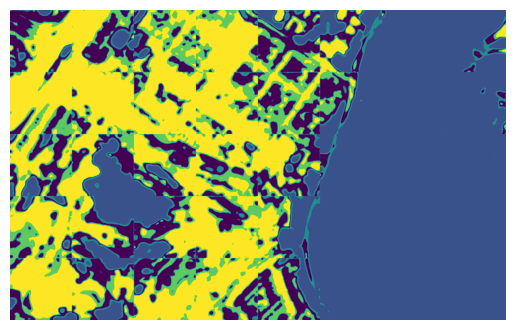

In [ ]:
patched_prediction = []
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        
        single_patch_img = patches_img[i,j,:,:,:]
        
        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
        single_patch_img = np.expand_dims(single_patch_img, axis=0)
        pred = model_2.predict(single_patch_img)
        pred = np.argmax(pred, axis=3)
        pred = pred[0, :,:]
                                 
        patched_prediction.append(pred)

patched_prediction = np.array(patched_prediction)
patched_prediction = np.reshape(patched_prediction, [patches_img.shape[0], patches_img.shape[1], 
                                            patches_img.shape[2], patches_img.shape[3]])

unpatched_prediction2 = unpatchify(patched_prediction, (large_img.shape[0], large_img.shape[1]))

plt.imshow(unpatched_prediction2)
plt.axis('off')

In [ ]:
patch_size = 256

input_img = scaler.fit_transform(img2.reshape(-1, img2.shape[-1])).reshape(img2.shape)
# При использовании алгоритма Вы передаёте Вашу `pred_func` (model.predict(...)), которая будет обрабатывать все изображения 8 раз, накладывая небольшие участки с перекрытием, 
# Обратите внимание, что model.predict(...) принимает 4D тензор формы (batch, x, y, nb_channels).
predictions_smooth2 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model_2.predict((img_batch_subdiv))
    )
)

final_prediction2 = np.argmax(predictions_smooth2, axis=2)

  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 141ms/step


 12%|█▎        | 1/8 [00:04<00:33,  4.82s/it]

7/7 [==============================] - 1s 142ms/step


 25%|██▌       | 2/8 [00:10<00:33,  5.59s/it]

7/7 [==============================] - 1s 142ms/step


 38%|███▊      | 3/8 [00:15<00:24,  4.97s/it]

7/7 [==============================] - 1s 139ms/step


 50%|█████     | 4/8 [00:19<00:19,  4.75s/it]

7/7 [==============================] - 1s 138ms/step


 62%|██████▎   | 5/8 [00:24<00:14,  4.79s/it]

7/7 [==============================] - 1s 138ms/step


 75%|███████▌  | 6/8 [00:29<00:09,  4.71s/it]

7/7 [==============================] - 1s 143ms/step


 88%|████████▊ | 7/8 [00:34<00:04,  4.96s/it]

7/7 [==============================] - 1s 140ms/step


100%|██████████| 8/8 [00:40<00:00,  5.10s/it]


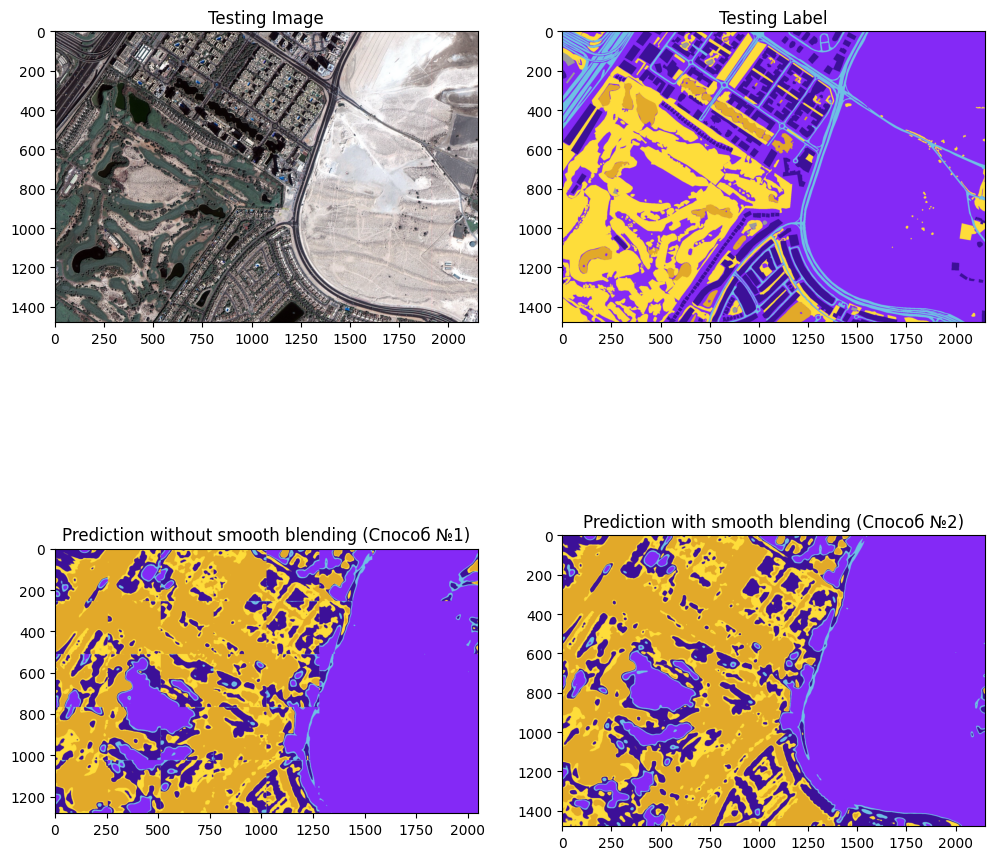

In [ ]:
prediction_with_smooth_blending=label_to_rgb(final_prediction2)
prediction_without_smooth_blending=label_to_rgb(unpatched_prediction2)


plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(img2)
plt.subplot(222)
plt.title('Testing Label')
plt.imshow(mask2)
plt.subplot(223)
plt.title('Prediction without smooth blending (Способ №1)')
plt.imshow(prediction_without_smooth_blending)
plt.subplot(224)
plt.title('Prediction with smooth blending (Способ №2)')
plt.imshow(prediction_with_smooth_blending)
plt.show()

### 2.3. Загрузите наиболее удачную модель из предыдущей работы. Сравните её точность с моделью, обученной в этой работе

In [ ]:
from keras.models import load_model

model7_1 = load_model("/content/drive/MyDrive/ModelNN71.h5", compile=False)
model7_2 = load_model("/content/drive/MyDrive/Model_2.h5", compile=False)

### 2.4. Отобразите предсказанную маску для каждого из трех снимков, загруженных ранее, в следующем формате: (исходный снимок, эталонная маска, предсказанная маска по модели, обученной в этой работе, предсказанная маска по модели, обученной в 6 работе. 

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg", 1)
original_mask = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 1/masks/image_part_001.png", 1)
original_mask = cv2.cvtColor(original_mask,cv2.COLOR_BGR2RGB)

In [ ]:
patch_size = 256

input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
# При использовании алгоритма Вы передаёте Вашу `pred_func` (model.predict(...)), которая будет обрабатывать все изображения 8 раз, накладывая небольшие участки с перекрытием, 
# Обратите внимание, что model.predict(...) принимает 4D тензор формы (batch, x, y, nb_channels).
predictions_smooth2 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model7_1.predict((img_batch_subdiv))
    )
)

final_prediction_model7_1 = np.argmax(predictions_smooth2, axis=2)

predictions_smooth2 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model7_2.predict((img_batch_subdiv))
    )
)

final_prediction_model7_2 = np.argmax(predictions_smooth2, axis=2)

  0%|          | 0/8 [00:00<?, ?it/s]

2/2 [==============================] - 6s 2s/step


 12%|█▎        | 1/8 [00:07<00:55,  7.93s/it]

2/2 [==============================] - 0s 238ms/step


 25%|██▌       | 2/8 [00:10<00:30,  5.02s/it]

2/2 [==============================] - 0s 247ms/step


 38%|███▊      | 3/8 [00:13<00:19,  3.97s/it]

2/2 [==============================] - 0s 252ms/step


 50%|█████     | 4/8 [00:16<00:13,  3.40s/it]

2/2 [==============================] - 0s 233ms/step


 62%|██████▎   | 5/8 [00:18<00:08,  2.86s/it]

2/2 [==============================] - 0s 177ms/step


 75%|███████▌  | 6/8 [00:19<00:05,  2.52s/it]

2/2 [==============================] - 0s 179ms/step


 88%|████████▊ | 7/8 [00:21<00:02,  2.30s/it]

2/2 [==============================] - 0s 179ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

2/2 [==============================] - 0s 178ms/step


 12%|█▎        | 1/8 [00:02<00:17,  2.50s/it]

2/2 [==============================] - 0s 168ms/step


 25%|██▌       | 2/8 [00:05<00:15,  2.52s/it]

2/2 [==============================] - 0s 176ms/step


 38%|███▊      | 3/8 [00:07<00:11,  2.37s/it]

2/2 [==============================] - 0s 170ms/step


 50%|█████     | 4/8 [00:09<00:08,  2.15s/it]

2/2 [==============================] - 0s 127ms/step


 62%|██████▎   | 5/8 [00:10<00:06,  2.00s/it]

2/2 [==============================] - 0s 119ms/step


 75%|███████▌  | 6/8 [00:12<00:03,  1.94s/it]

2/2 [==============================] - 0s 127ms/step


 88%|████████▊ | 7/8 [00:14<00:01,  1.88s/it]

2/2 [==============================] - 0s 129ms/step


100%|██████████| 8/8 [00:16<00:00,  2.01s/it]


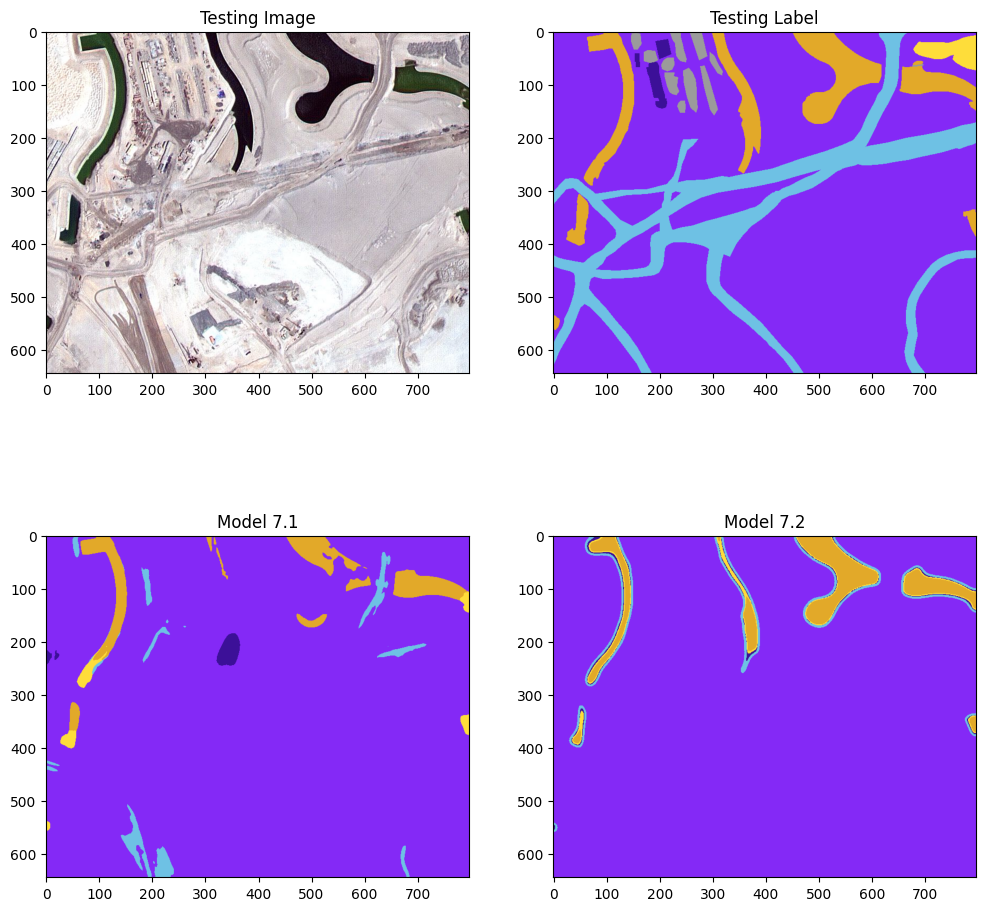

In [ ]:
prediction_without_smooth_blending__model7_1=label_to_rgb(final_prediction_model7_1)
prediction_without_smooth_blending__model7_2=label_to_rgb(final_prediction_model7_2)


plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Testing Label')
plt.imshow(original_mask)
plt.subplot(223)
plt.title('Model 7.1')
plt.imshow(prediction_without_smooth_blending__model7_1)
plt.subplot(224)
plt.title('Model 7.2')
plt.imshow(prediction_without_smooth_blending__model7_2)
plt.show()

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 3/images/image_part_001.jpg", 1)
original_mask = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 3/masks/image_part_001.png", 1)
original_mask = cv2.cvtColor(original_mask,cv2.COLOR_BGR2RGB)

In [ ]:
patch_size = 256

input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
# При использовании алгоритма Вы передаёте Вашу `pred_func` (model.predict(...)), которая будет обрабатывать все изображения 8 раз, накладывая небольшие участки с перекрытием, 
# Обратите внимание, что model.predict(...) принимает 4D тензор формы (batch, x, y, nb_channels).
predictions_smooth2 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model7_1.predict((img_batch_subdiv))
    )
)

final_prediction_model7_1 = np.argmax(predictions_smooth2, axis=2)

predictions_smooth2 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model7_2.predict((img_batch_subdiv))
    )
)

final_prediction_model7_2 = np.argmax(predictions_smooth2, axis=2)

  0%|          | 0/8 [00:00<?, ?it/s]

2/2 [==============================] - 2s 2s/step


 12%|█▎        | 1/8 [00:03<00:26,  3.72s/it]

2/2 [==============================] - 0s 252ms/step


 25%|██▌       | 2/8 [00:06<00:18,  3.04s/it]

2/2 [==============================] - 0s 222ms/step


 38%|███▊      | 3/8 [00:08<00:13,  2.76s/it]

2/2 [==============================] - 0s 223ms/step


 50%|█████     | 4/8 [00:10<00:09,  2.47s/it]

2/2 [==============================] - 0s 183ms/step


 62%|██████▎   | 5/8 [00:12<00:06,  2.27s/it]

2/2 [==============================] - 0s 239ms/step


 75%|███████▌  | 6/8 [00:14<00:04,  2.19s/it]

2/2 [==============================] - 0s 239ms/step


 88%|████████▊ | 7/8 [00:16<00:02,  2.13s/it]

2/2 [==============================] - 0s 180ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

2/2 [==============================] - 1s 1s/step


 12%|█▎        | 1/8 [00:03<00:22,  3.28s/it]

2/2 [==============================] - 0s 164ms/step


 25%|██▌       | 2/8 [00:05<00:17,  2.84s/it]

2/2 [==============================] - 0s 164ms/step


 38%|███▊      | 3/8 [00:07<00:12,  2.41s/it]

2/2 [==============================] - 0s 139ms/step


 50%|█████     | 4/8 [00:09<00:08,  2.25s/it]

2/2 [==============================] - 0s 180ms/step


 62%|██████▎   | 5/8 [00:11<00:06,  2.13s/it]

2/2 [==============================] - 0s 170ms/step


 75%|███████▌  | 6/8 [00:13<00:04,  2.09s/it]

2/2 [==============================] - 0s 128ms/step


 88%|████████▊ | 7/8 [00:15<00:02,  2.02s/it]

2/2 [==============================] - 0s 174ms/step


100%|██████████| 8/8 [00:17<00:00,  2.23s/it]


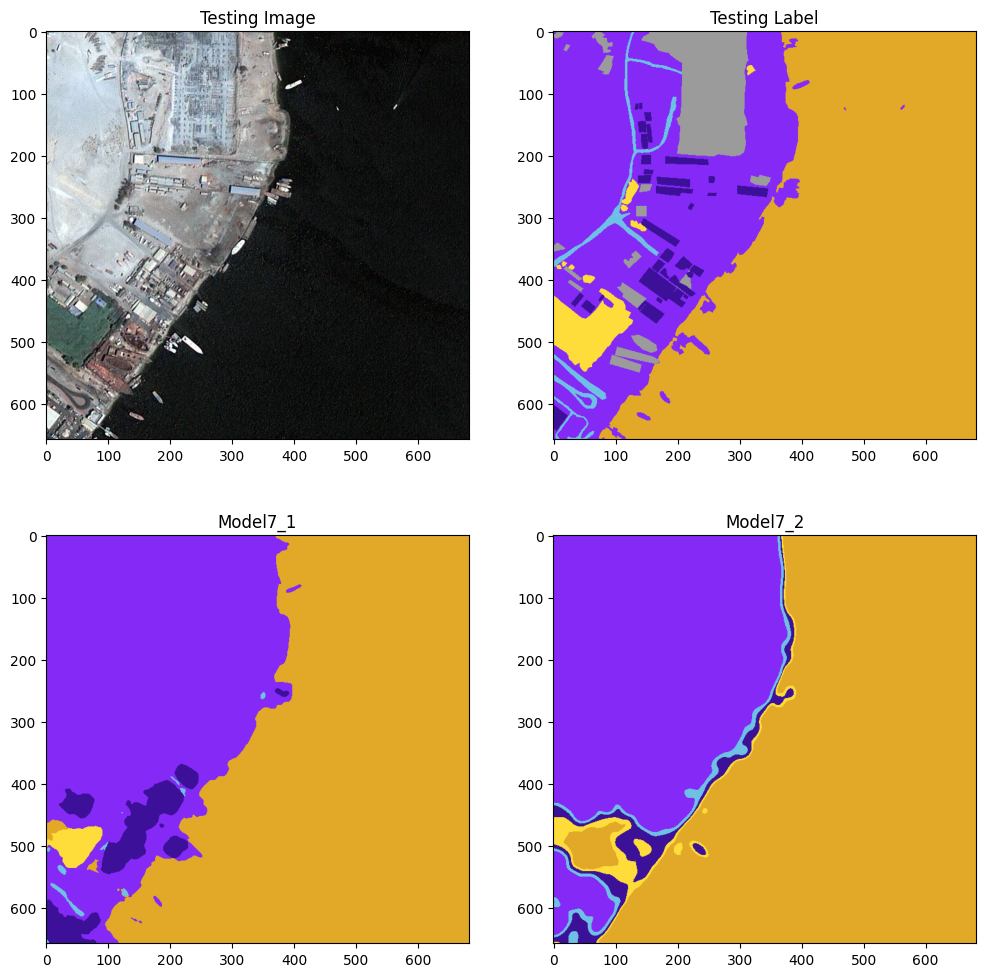

In [ ]:
prediction_without_smooth_blending__model7_1=label_to_rgb(final_prediction_model7_1)
prediction_without_smooth_blending__model7_2=label_to_rgb(final_prediction_model7_2)


plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Testing Label')
plt.imshow(original_mask)
plt.subplot(223)
plt.title('Model7_1')
plt.imshow(prediction_without_smooth_blending__model7_1)
plt.subplot(224)
plt.title('Model7_2')
plt.imshow(prediction_without_smooth_blending__model7_2)
plt.show()

In [ ]:
import cv2
img = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 6/images/image_part_001.jpg", 1)
original_mask = cv2.imread("/content/drive/MyDrive/Semantic segmentation dataset/Tile 6/masks/image_part_001.png", 1)
original_mask = cv2.cvtColor(original_mask,cv2.COLOR_BGR2RGB)

In [ ]:
patch_size = 256

input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
# При использовании алгоритма Вы передаёте Вашу `pred_func` (model.predict(...)), которая будет обрабатывать все изображения 8 раз, накладывая небольшие участки с перекрытием, 
# Обратите внимание, что model.predict(...) принимает 4D тензор формы (batch, x, y, nb_channels).
predictions_smooth2 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model7_1.predict((img_batch_subdiv))
    )
)

final_prediction_model7_1 = np.argmax(predictions_smooth2, axis=2)

predictions_smooth2 = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    subdivisions=2,  # Минимальное количество перекрытий для окон. Должно быть четным числом.
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model7_2.predict((img_batch_subdiv))
    )
)

final_prediction_model7_2 = np.argmax(predictions_smooth2, axis=2)

  0%|          | 0/8 [00:00<?, ?it/s]

2/2 [==============================] - 3s 3s/step


 12%|█▎        | 1/8 [00:04<00:33,  4.85s/it]

2/2 [==============================] - 0s 237ms/step


 25%|██▌       | 2/8 [00:07<00:20,  3.37s/it]

2/2 [==============================] - 0s 183ms/step


 38%|███▊      | 3/8 [00:09<00:14,  2.91s/it]

2/2 [==============================] - 0s 258ms/step


 50%|█████     | 4/8 [00:12<00:10,  2.75s/it]

2/2 [==============================] - 0s 231ms/step


 62%|██████▎   | 5/8 [00:14<00:07,  2.60s/it]

2/2 [==============================] - 0s 221ms/step


 75%|███████▌  | 6/8 [00:16<00:04,  2.43s/it]

2/2 [==============================] - 0s 242ms/step


 88%|████████▊ | 7/8 [00:19<00:02,  2.51s/it]

2/2 [==============================] - 0s 225ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

2/2 [==============================] - 2s 2s/step


 12%|█▎        | 1/8 [00:03<00:25,  3.65s/it]

2/2 [==============================] - 0s 169ms/step


 25%|██▌       | 2/8 [00:05<00:16,  2.77s/it]

2/2 [==============================] - 0s 132ms/step


 38%|███▊      | 3/8 [00:07<00:11,  2.36s/it]

2/2 [==============================] - 0s 130ms/step


 50%|█████     | 4/8 [00:09<00:09,  2.31s/it]

2/2 [==============================] - 0s 164ms/step


 62%|██████▎   | 5/8 [00:12<00:07,  2.41s/it]

2/2 [==============================] - 0s 176ms/step


 75%|███████▌  | 6/8 [00:15<00:04,  2.49s/it]

2/2 [==============================] - 0s 162ms/step


 88%|████████▊ | 7/8 [00:17<00:02,  2.41s/it]

2/2 [==============================] - 0s 130ms/step


100%|██████████| 8/8 [00:19<00:00,  2.42s/it]


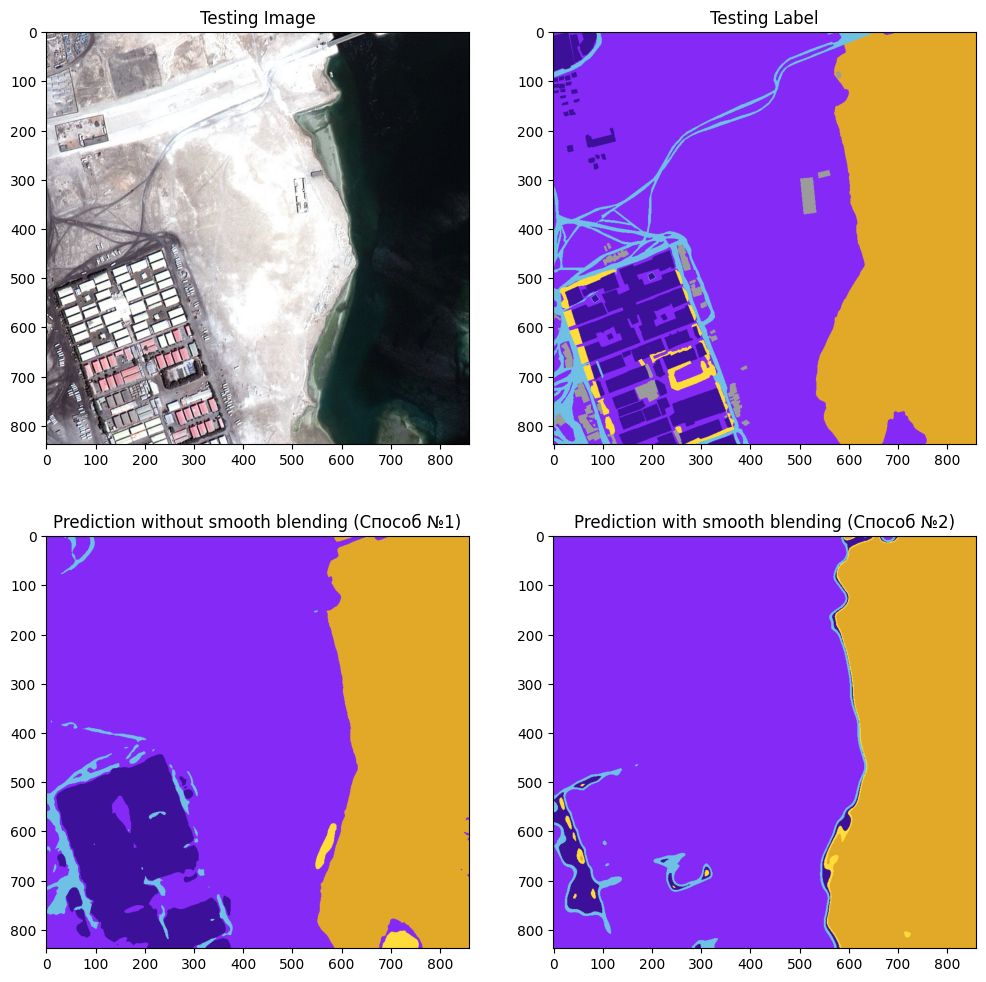

In [ ]:
prediction_without_smooth_blending__model7_1=label_to_rgb(final_prediction_model7_1)
prediction_without_smooth_blending__model7_2=label_to_rgb(final_prediction_model7_2)


plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Testing Label')
plt.imshow(original_mask)
plt.subplot(223)
plt.title('Prediction without smooth blending (Способ №1)')
plt.imshow(prediction_without_smooth_blending__model7_1)
plt.subplot(224)
plt.title('Prediction with smooth blending (Способ №2)')
plt.imshow(prediction_without_smooth_blending__model7_2)
plt.show()

## Задание №3. Используйте модель с Unet-подобной архитектурой для решения задач №2 и №3 из практической работы №6

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from skimage.color import rgb2gray


def preprocess(array):
    """
    Нормализует предоставленный массив и преобразует его в соответствующий формат.

    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array


def noise(array):
    """
    Добавляет случайный шум к каждому изображению в предоставленном массиве.

    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Отображает десять случайных изображений из каждого из предоставленных массивов.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(rgb2gray(image1).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rgb2gray(image2).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np


In [ ]:
(train_images, _), (test_images, _) = cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


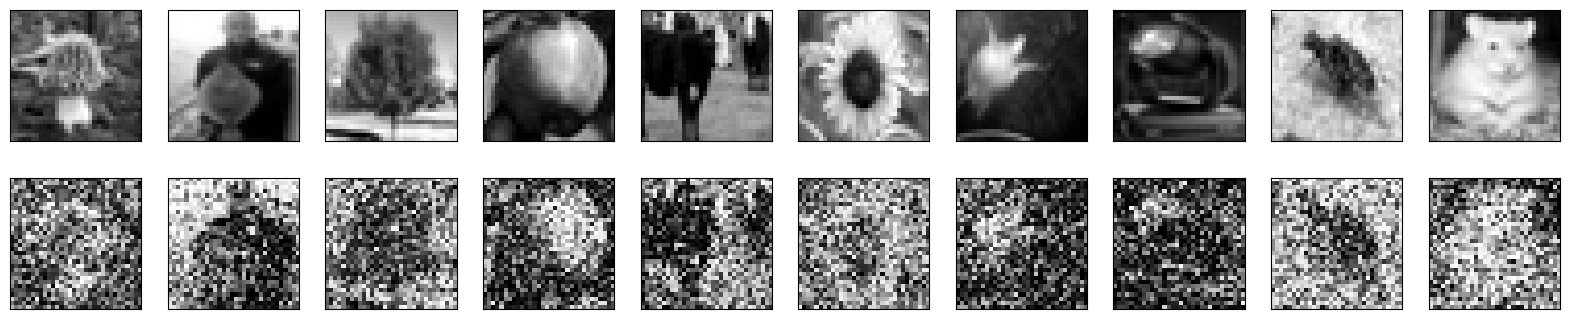

In [ ]:
# Нормализация и изменение формы данных
train_data = preprocess(train_images)
test_data = preprocess(test_images)

# Создание копии данных с добавленным шумом
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Отображение данных выборки и его версии с добавленным шумом
display(train_data, noisy_train_data)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

def conv_block(input_tensor, num_filters):
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    return encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
    decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    return decoder

def unet_model(input_shape=(32, 32, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)
    
    enc1 = conv_block(inputs, 64)
    pool1 = layers.MaxPooling2D((2, 2))(enc1)
    
    enc2 = conv_block(pool1, 128)
    pool2 = layers.MaxPooling2D((2, 2))(enc2)
    
    enc3 = conv_block(pool2, 256)
    pool3 = layers.MaxPooling2D((2, 2))(enc3)
    
    enc4 = conv_block(pool3, 512)
    pool4 = layers.MaxPooling2D((2, 2))(enc4)
    
    center = conv_block(pool4, 1024)
    
    dec4 = decoder_block(center, enc4, 512)
    dec3 = decoder_block(dec4, enc3, 256)
    dec2 = decoder_block(dec3, enc2, 128)
    dec1 = decoder_block(dec2, enc1, 64)
    
    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(dec1)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [ ]:
model = unet_model()
model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 64)   0           ['batch_normalization[0][0]']

In [ ]:
model.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, noisy_test_data),
)

Epoch 1/50
391/391 [==============================] - 77s 174ms/step - loss: 0.0098 - accuracy: 0.6630 - val_loss: 0.0961 - val_accuracy: 0.4149
Epoch 2/50
391/391 [==============================] - 62s 160ms/step - loss: 0.0079 - accuracy: 0.7012 - val_loss: 0.1084 - val_accuracy: 0.4156
Epoch 3/50
391/391 [==============================] - 64s 163ms/step - loss: 0.0076 - accuracy: 0.7107 - val_loss: 0.1102 - val_accuracy: 0.4071
Epoch 4/50
391/391 [==============================] - 62s 159ms/step - loss: 0.0074 - accuracy: 0.7160 - val_loss: 0.1076 - val_accuracy: 0.4119
Epoch 5/50
391/391 [==============================] - 62s 159ms/step - loss: 0.0073 - accuracy: 0.7213 - val_loss: 0.1070 - val_accuracy: 0.4251
Epoch 6/50
391/391 [==============================] - 62s 159ms/step - loss: 0.0072 - accuracy: 0.7249 - val_loss: 0.1102 - val_accuracy: 0.4193
Epoch 7/50
391/391 [==============================] - 62s 160ms/step - loss: 0.0071 - accuracy: 0.7273 - val_loss: 0.1058 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/Unit_model.h5')

## Реализуйте автоэнкодер для улучшения качества изображения путём увеличения его разрешения

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils import paths
import cv2
from google.colab.patches import cv2_imshow

from tensorflow.keras import layers

from tensorflow.keras.models import Model

75
0
10
20
30
40
50
60
70
74 фотографий


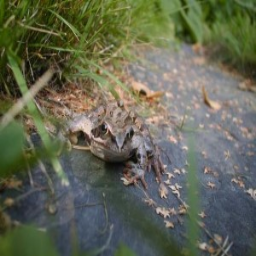

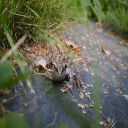

In [ ]:
images256 = []
images128 = []
i = 0
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/animal/frog")))

n = len(imagePaths)
print(n)
for i in range(75):
	if i % 10 == 0:
		print(i)	
	image = cv2.imread(imagePaths[i])
	try:
		images256.append(cv2.resize(image, (256, 256)))
		images128.append(cv2.resize(image, (128, 128)))
	except Exception as e:
		print(e)
		print('фото не обработалось',imagePaths[i])
print(i, 'фотографий')
cv2_imshow(images256[1])
cv2_imshow(images128[1])

In [ ]:
from tensorflow.keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Conv2DTranspose, BatchNormalization
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

input = layers.Input(shape=(128, 128, 3))

# Encoder
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(input)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)

x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

from keras import optimizers

optimizer = optimizers.Adam(0.001)
# Autoencoder
unet_model128 = Model(input, x)
unet_model128.compile(optimizer=optimizer, loss="mean_squared_error", metrics=['mse', 'accuracy'])
unet_model128.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization_38 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_38 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_39 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0   

In [ ]:
def preprocess(array, n):
    """
    Нормализует предоставленный массив и преобразует его в соответствующий формат.
    """
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), n, n, 3))
    return array

In [ ]:
from sklearn.model_selection import train_test_split

print(np.asarray(images256).shape, np.asarray(images128).shape)
images256 = preprocess(np.asarray(images256), 256)
images128 = preprocess(np.asarray(images128), 128)

X_train, X_test, y_train, y_test = train_test_split(images128, images256, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 256, 256, 3) (75, 128, 128, 3)
(60, 128, 128, 3) (15, 128, 128, 3) (60, 256, 256, 3) (15, 256, 256, 3)


In [ ]:
unet_model128.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=10,
    shuffle=True,
    validation_data=(X_test, y_test),
)

Epoch 1/100
6/6 [==============================] - 3s 260ms/step - loss: 0.0639 - mse: 0.0639 - accuracy: 0.3836 - val_loss: 0.0682 - val_mse: 0.0682 - val_accuracy: 0.4499
Epoch 2/100
6/6 [==============================] - 1s 178ms/step - loss: 0.0228 - mse: 0.0228 - accuracy: 0.4684 - val_loss: 0.0606 - val_mse: 0.0606 - val_accuracy: 0.3776
Epoch 3/100
6/6 [==============================] - 1s 182ms/step - loss: 0.0150 - mse: 0.0150 - accuracy: 0.5143 - val_loss: 0.0576 - val_mse: 0.0576 - val_accuracy: 0.4553
Epoch 4/100
6/6 [==============================] - 1s 165ms/step - loss: 0.0133 - mse: 0.0133 - accuracy: 0.5397 - val_loss: 0.0586 - val_mse: 0.0586 - val_accuracy: 0.4801
Epoch 5/100
6/6 [==============================] - 1s 164ms/step - loss: 0.0134 - mse: 0.0134 - accuracy: 0.5421 - val_loss: 0.0606 - val_mse: 0.0606 - val_accuracy: 0.5088
Epoch 6/100
6/6 [==============================] - 1s 164ms/step - loss: 0.0114 - mse: 0.0114 - accuracy: 0.5635 - val_loss: 0.0632 - v

In [ ]:
unet_model128.save('/content/drive/MyDrive/model_frogs_128_256.h5')

In [ ]:
from tensorflow import keras
unet_model128 = keras.models.load_model('/content/drive/MyDrive/model_frogs_128_256.h5', compile=False)

1/1 [==============================] - 1s 748ms/step


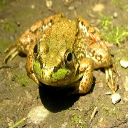

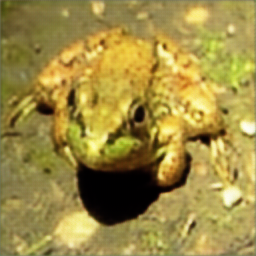

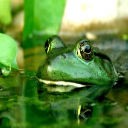

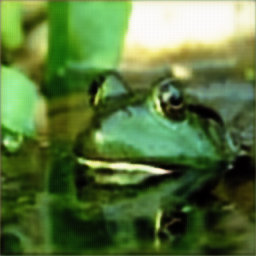

In [ ]:
test = []
test.append(X_train[:2])
predictions = unet_model128.predict(test)
for i in range(len(predictions)):
  cv2_imshow(X_train[i]*255.0)
  # cv2_imshow(y_train[i]*255.0)
  cv2_imshow(predictions[i]*255.0)

1/1 [==============================] - 0s 25ms/step


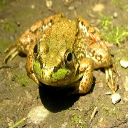

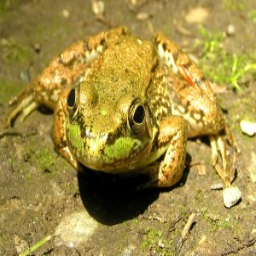

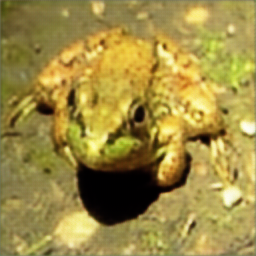

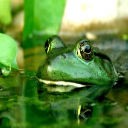

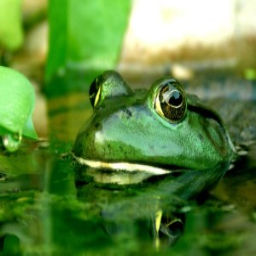

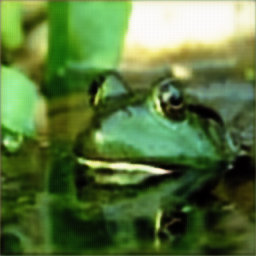

In [ ]:
test = []
test.append(X_train[:2])
predictions = unet_model128.predict(test)
for i in range(len(predictions)):
  cv2_imshow(X_train[i]*255.0)
  cv2_imshow(y_train[i]*255.0)
  cv2_imshow(predictions[i]*255.0)

##Сравнение 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from skimage.color import rgb2gray


def preprocess(array):
    """
    Нормализует предоставленный массив и преобразует его в соответствующий формат.

    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array


def noise(array):
    """
    Добавляет случайный шум к каждому изображению в предоставленном массиве.

    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Отображает десять случайных изображений из каждого из предоставленных массивов.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(rgb2gray(image1).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rgb2gray(image2).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

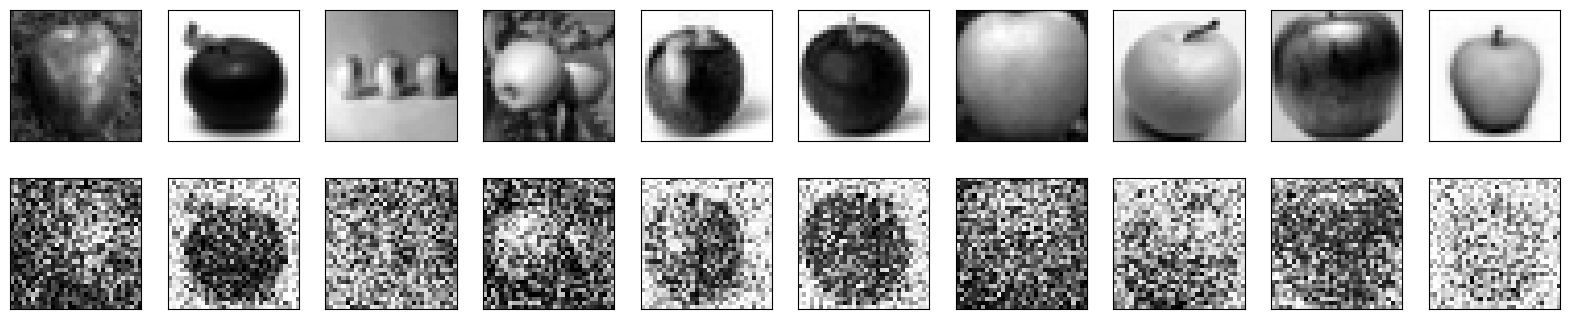

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np

# загрузка данных
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# выбор изображений одного типа
class_idx = 0  # индекс выбранного класса
train_images_class = train_images[train_labels[:,0]==class_idx]
test_images_class = test_images[test_labels[:,0]==class_idx]

# Нормализация и изменение формы данных
train_data = preprocess(train_images_class)
test_data = preprocess(test_images_class)

# Создание копии данных с добавленным шумом
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Отображение данных выборки и его версии с добавленным шумом
display(train_data, noisy_train_data)

In [ ]:
from keras.models import load_model
model_pr6_ts2 = load_model('/content/drive/MyDrive/Github/ANN/autoencoder_noise.h5', compile=False)

4/4 [==============================] - 9s 42ms/step


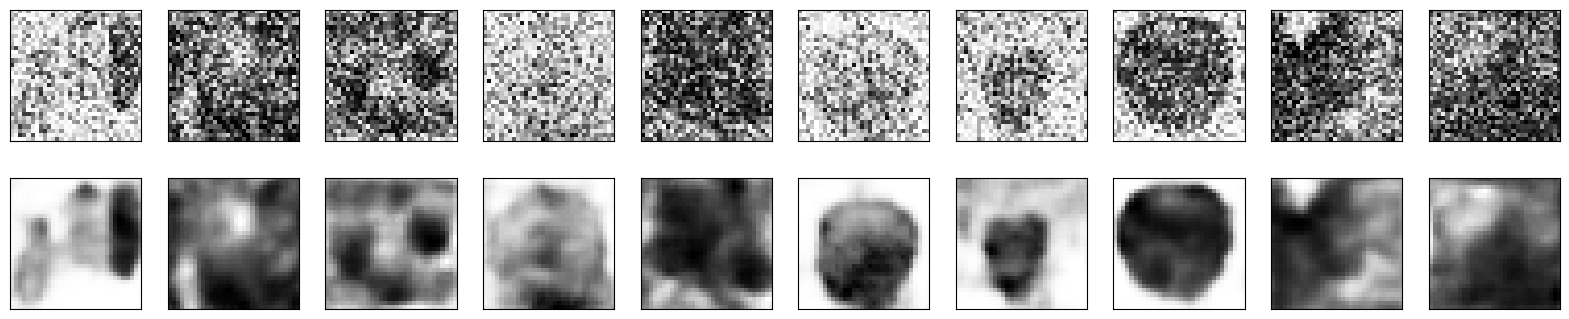

In [ ]:
predictions = model_pr6_ts2.predict(noisy_test_data)
display(noisy_test_data, predictions)

4/4 [==============================] - 0s 24ms/step


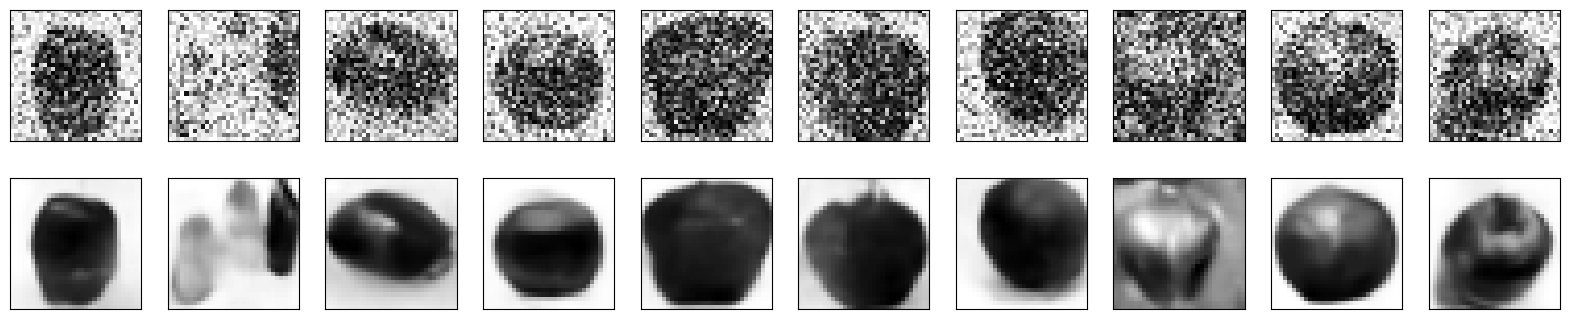

In [ ]:
predictions = model.predict(noisy_test_data)
display(noisy_test_data, predictions)